In [1]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f177ae142d15ad97698b2093f15e2b6c8a08efc1e38450b8b98c86cec3efe783
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications 
from tensorflow.keras import preprocessing

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import lime
from lime import lime_image


model = applications.ResNet50(weights='imagenet')

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

def predict_with_resnet50(image_path):
    preprocessed_image = preprocess_image(image_path)
    preds = model.predict(preprocessed_image)
    return decode_predictions(preds, top=3)[0]



102981632/102967424 [==============================] - 1s 0us/step


ResNet50 Predictions:
vizsla : 0.99414486
Rhodesian_ridgeback : 0.0047387783
redbone : 0.00044809552


  0%|          | 0/1000 [00:00<?, ?it/s]

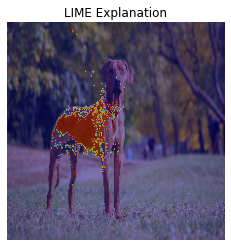

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


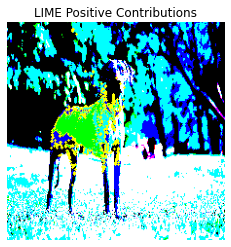

In [8]:
image_path = r'C:\Users\Administrator\Desktop\data\dog.jpg'

preds = predict_with_resnet50(image_path)
print("ResNet50 Predictions:")
for pred in preds:
    print(pred[1], ':', pred[2])

    
    
from skimage.segmentation import mark_boundaries
image_array = preprocess_image(image_path)
image_array = np.array(image_array, dtype=np.float64)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)


plt.imshow(image.load_img(image_path, target_size=(224, 224)))
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.title('LIME Explanation')
plt.axis('off')
plt.show()

temp_pos, mask_pos = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=True
)
plt.imshow(mark_boundaries(temp, mask))
plt.title('LIME Positive Contributions')
plt.axis('off')
plt.show()



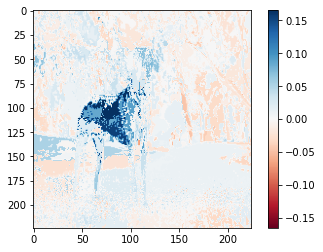

In [9]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()